In [1]:
import numpy as np
import pandas as pd

import tqdm

from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import scipy.stats as stats


In [20]:
rcParams['figure.figsize'] = 11.7,8.27
TEAM_COLORS = {
    "Mercedes":"#00D2BE",
    "Custom":(22.6/255.0, 21.1/255.0, 29.0/255.0),
    "Mc Laren":"#FF8700",
    "Ferrari":"#DC0000",
    "Red Bull":"#0600EF",
    "Alpine":"#0090FF",
    "Aston Martin":"#006F62",
    "Haas":"#FFFFFF",
    "Williams":"#005AFF",
    "Alfa Romeo":"#900000",
    "AlphaTauri":"#2B4562",
}

In [3]:
df = pd.read_csv("data/imola.csv", names=["frame", "position", "name", "time", "date", "custom", "tc", "gear", "brakes", "team"])
df

,frame,position,name,time,date,custom,tc,gear,brakes,team
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren
...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren


In [4]:
# Filters out rows with wrong time and and duplicate rows
df = df[(df.time.str.count(":") == 1) & (df.time.str.count("\\.") == 1) & (df.date.str.count("/") == 2)]
df = df.drop_duplicates(subset=["name","time"])
df = df[df.time.str.len() == 8]
df = df[(df.custom == "Yes") | (df.custom == "No")]
df

,frame,position,name,time,date,custom,tc,gear,brakes,team
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren
...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren


In [5]:
# Time to seconds
df["time_s"] = df.apply(lambda x: 60 * int(x["time"].split(":")[0]) + int(x["time"].split(":")[1].split(".")[0]) + 0.001 * int(x["time"].split(".")[1]), axis=1)
df

,frame,position,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull,76.617
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull,76.617
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617


In [6]:
# Filters out mistakes in times
df = df[df["time_s"] < 77]
df

,frame,position,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull,76.617
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull,76.617
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617


In [7]:
# Filters out dates with wrong formats '/x/xxxx', 'x//xxxx', or 'x/x/' or any of their combination
df = df[df.date.str.split("/").str[0].str.len() > 0]
df = df[df.date.str.split("/").str[1].str.len() > 0]
df = df[df.date.str.split("/").str[2].str.len() > 0]
df

,frame,position,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull,76.617
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull,76.617
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617


In [8]:
# correct date formatting for easy sorting
df["date_str"] = df.apply(lambda x: f"{int(x['date'].split('/')[2])}{int(x['date'].split('/')[1]):02}{int(x['date'].split('/')[0]):02}", axis=1)
df

,frame,position,name,time,date,custom,tc,gear,brakes,team,time_s,date_str
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075,20211130
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097,20220424
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120,20211029
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128,20211202
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137,20211130
...,...,...,...,...,...,...,...,...,...,...,...,...
54699,190283,5414.0,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull,76.617,20220203
54700,190286,5414.0,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull,76.617,20220303
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617,20220422
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617,20220425


In [9]:
df.sort_values(by=["time_s", "date_str"])

,frame,position,name,time,date,custom,tc,gear,brakes,team,time_s,date_str
0,145,15.0,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075,20211130
1,148,16.0,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097,20220424
2,151,17.0,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120,20211029
3,155,18.0,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128,20211202
4,158,19.0,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137,20211130
...,...,...,...,...,...,...,...,...,...,...,...,...
54687,190243,5413.0,Chip,1:16.617,21/4/2022,No,1,0,1,Custom,76.617,20220421
54701,190289,5414.0,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617,20220422
54702,190293,5414.0,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617,20220425
54692,190259,5413.0,KID,1:16.617,22/12/2022,Yes,1,0,1,Haas,76.617,20221222


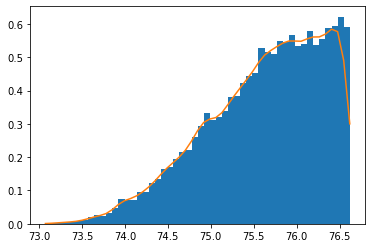

In [10]:
n, x,_ = plt.hist("time_s", bins=50, data=df, density=True)
density = stats.gaussian_kde(df.time_s)
plt.plot(x, density(x))
plt.show()

In [11]:
df["team"].value_counts()

Red Bull        18553
Mercedes        12497
Ferrari          3840
Mc Laren         2848
Custom           2168
Alpine           2044
Aston Martin     1765
AlphaTauri       1286
Alfa Romeo       1051
Williams         1038
Haas              748
Name: team, dtype: int64

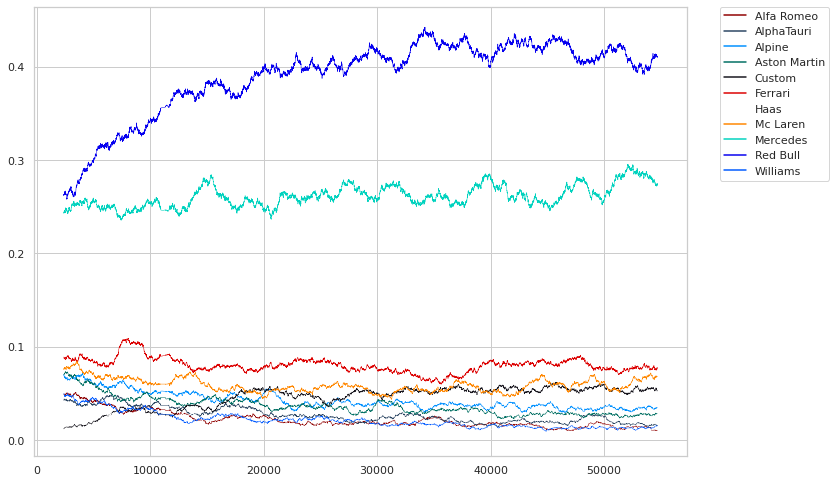

In [26]:
WINDOW_WIDTH = 2000
team_proportions = pd.get_dummies(df.team).rolling(WINDOW_WIDTH).sum() / WINDOW_WIDTH

sns.set_theme(style="whitegrid")
p = sns.lineplot(data=team_proportions, palette=TEAM_COLORS, dashes=False, markers=False, linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("temp/000.png", dpi=150, bbox_inches="tight")
plt.show()

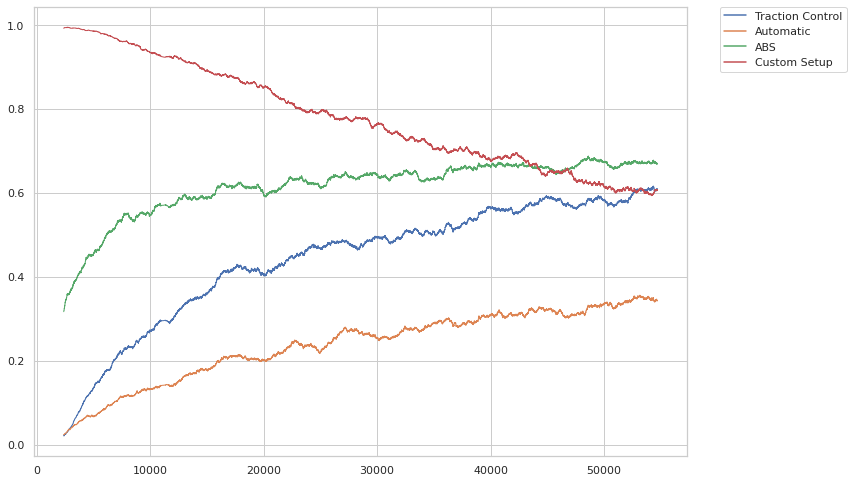

In [31]:
WINDOW_WIDTH = 2000
tc = (pd.get_dummies(df.tc).rolling(WINDOW_WIDTH).sum() / WINDOW_WIDTH)[1]
gear = (pd.get_dummies(df.gear).rolling(WINDOW_WIDTH).sum() / WINDOW_WIDTH)[1]
brake = (pd.get_dummies(df.brakes).rolling(WINDOW_WIDTH).sum() / WINDOW_WIDTH)[1]
custom = (pd.get_dummies(df.custom).rolling(WINDOW_WIDTH).sum() / WINDOW_WIDTH)["Yes"]

proportions = pd.concat([tc,gear,brake,custom], axis=1)
proportions.columns = ["Traction Control", "Automatic", "ABS", "Custom Setup"]

sns.set_theme(style="whitegrid")
p = sns.lineplot(data=proportions, dashes=False, markers=False, linewidth=1.0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()